In [58]:
DIR = {'L':[[[1,0],[0,1]],[[0,-1],[-1,0]]],
       '7':[[[-1,0],[0,-1]],[[0,1],[1,0]]],
       '|':[[[1,0],[1,0]],[[-1,0],[-1,0]]],
       'F':[[[0,-1],[1,0]],[[-1,0],[0,1]]],
       '-':[[[0,1],[0,1]],[[0,-1],[0,-1]]],
       'J':[[[1,0],[0,-1]],[[0,1],[-1,0]]]
       }

In [59]:
with open('input.txt') as f:
    GRID = []
    for line in f.readlines():
        GRID.append(line)

In [75]:
def evol(pos,dpos):
    x,y = pos[0], pos[1]
    pipe = GRID[x][y]
    dir = DIR[pipe]
    for mat in dir:
        if mat[0] == dpos:
            return mat[1]

In [76]:
map = [[0 for i in range(len(line))] for line in grid]

In [77]:
traj = [[],[]]
for x,l in enumerate(GRID):
    if 'S' in l:
        pos = [x,l.index('S')]
        break
traj[0].append(pos)
traj[1].append(pos)
x,y = pos

N = []

if x > 0:
    N.append([x-1,y])
if x < len(GRID)-1:
    N.append([x+1,y])
if y > 0:
    N.append([x,y-1])
if y < len(GRID[0])-1:
    N.append([x, y+1])

xf,yf = pos
dirf = [0,0]
yb, yb = pos
dirb = [0,0]

# on trouve les directions dans lesquelles partent les deux tuyaux
for [xn, yn] in N:
    dx, dy = xn-x, yn-y
    pipe = GRID[xn][yn]
    for mat in DIR[pipe]:
        if mat[0] == [dx,dy]:
            if dirf == [0,0]:
                dirf = mat[0]
            else:
                dirb = mat[0]
            
posf = [pos[i] + dirf[i] for i in range(2)]
posb = [pos[i] + dirb[i] for i in range(2)]
traj[0].append(posf)
traj[1].append(posb)
j=1
print(posf)
print(posb)
while posf!=posb:
    
    dirf = evol(posf, dirf)
    posf = [posf[i] + dirf[i] for i in range(2)]
    
  
    dirb = evol(posb, dirb)
    posb = [posb[i] + dirb[i] for i in range(2)]
    traj[0].append(posf)
    traj[1].append(posb)
    j+=1

[97, 90]
[99, 90]


(-96.8, 52.8, -47.8, 101.8)

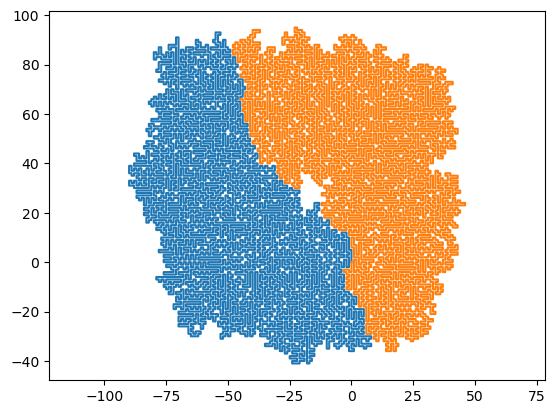

In [78]:
import matplotlib.pyplot as plt

plt.plot([-traj[0][0][1]+pos[1] for pos in traj[0]], [+traj[0][0][0]-pos[0] for pos in traj[0]])
plt.plot([-traj[1][0][1]+pos[1] for pos in traj[1]],[+traj[1][0][0]- pos[0] for pos in traj[1]])
plt.axis('equal')

In [80]:
full_traj = traj[0]+traj[1]

In [83]:
with open('output.txt','w') as f:
    for x, l in enumerate(GRID):
        for y,c in enumerate(l):
            if [x,y] in full_traj:
                f.write(c)
            elif c=='.':
                f.write('o')
            else:
                f.write(' ')
        f.write('\n')

In [ ]:

border
for x, l in enumerate(GRID):
    for y,x in enumerate(GRID):
